In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


c:\Users\ARDA\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

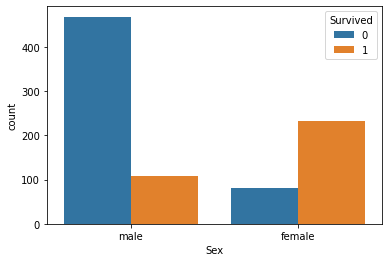

In [4]:
sns.countplot("Sex", hue = "Survived", data = df)

c:\Users\ARDA\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

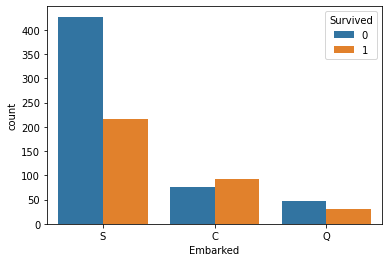

In [5]:
sns.countplot("Embarked", hue = "Survived", data = df)

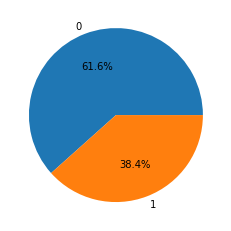

In [6]:
plt.pie(df["Survived"].value_counts(), labels = df["Survived"].value_counts().index, autopct='%1.1f%%')
plt.show()

# *Handling the Missing values*

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [9]:
df.drop(["PassengerId","Cabin","Name","Ticket"],axis=1,inplace=True)

In [10]:
df[df["Embarked"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [11]:
df.drop(61,axis=0,inplace=True)
df.drop(829,axis=0,inplace=True)

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# *Encoding the Categorical Columns*

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

df = pd.get_dummies(df,"Embarked")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


# *Splitting the data into training data & Test data*

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop(["Survived"],axis=1)
y= df["Survived"]
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.33,random_state=10)

In [19]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn import neighbors
from sklearn.svm import SVC
from catboost import CatBoostRegressor,CatBoostClassifier
from lightgbm import LGBMRegressor,LGBMClassifier
from xgboost import XGBRegressor,XGBClassifier
import warnings
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings("ignore")

# *Model Training*

In [28]:
from tabnanny import verbose


models = [KNeighborsClassifier(),
            LogisticRegression(),
            SVC(),
            MLPClassifier(),
            DecisionTreeClassifier(),
            RandomForestClassifier(),
            GradientBoostingClassifier(),
            CatBoostClassifier(verbose=0),
            LGBMClassifier(),
            LogisticRegression()]
for i in models:
    model = i.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = cross_val_score(i,X,y,cv=10).mean()
    #dogruluk = accuracy_score(y_test,y_pred)
    print(i,"Modeli için Doğruluk Oranı:",score)

KNeighborsClassifier() Modeli için Doğruluk Oranı: 0.6941266598569968
LogisticRegression() Modeli için Doğruluk Oranı: 0.7975868232890705
SVC() Modeli için Doğruluk Oranı: 0.6794050051072522
MLPClassifier() Modeli için Doğruluk Oranı: 0.7805286006128702
DecisionTreeClassifier() Modeli için Doğruluk Oranı: 0.7739402451481102
RandomForestClassifier() Modeli için Doğruluk Oranı: 0.8110572012257405
GradientBoostingClassifier() Modeli için Doğruluk Oranı: 0.8301455566905005
<catboost.core.CatBoostClassifier object at 0x000002790C4F7100> Modeli için Doğruluk Oranı: 0.8323927477017363
LGBMClassifier() Modeli için Doğruluk Oranı: 0.8267875383043922
LogisticRegression() Modeli için Doğruluk Oranı: 0.7975868232890705


**As we see, the best model is CatBoostClassifier**

**Model Tuning using GridSearchCV**

In [31]:
model_new = CatBoostClassifier(verbose=False).fit(X_train,y_train)
catb_params = {"iterations" : [200,500,1000],
               "learning_rate" : [0.01,0.03,0.1],
               "depth" : [4,5,8]}

model_tuned = GridSearchCV(model_new,catb_params,cv=10,n_jobs=-1,verbose=False).fit(X_train,y_train)
print(model_tuned.best_params_)

pred = model_tuned.best_estimator_.predict(X_test)

{'depth': 5, 'iterations': 200, 'learning_rate': 0.01}


In [32]:
comparison = pd.DataFrame({"Y_test": y_test[:20],
                            "Pred": pred[:20]})
comparison

,Y_test,Pred
306,1,1
160,0,0
47,1,1
330,1,1
618,1,1
279,1,0
446,1,1
448,1,1
848,0,0
490,0,0


In [33]:
acc = accuracy_score(y_test,pred)
print("Accuracy score of data set:",acc)

Accuracy score of data set: 0.8134453781512605
